##Michał Szumielewicz HW5

#Task 1

f(x1, x2) = (x1 + x2)^2

Assume that x1, x2 ~ U[-1,1] and x1=x2 (full dependency)

Calculate PD profile for variable x1 in this model.

g(z) = mean(z^2 + 2 * z * x2 + x2^2) over x2 in U[-1,1]

g(z) = z^2 + mean(x2^2) because mean x2 is 0

we can find the simple integral (1/3 * x2^3)' = x2^2

mean of x2^2 for x2 in U[-1,1] is then ((1/3 * 1^3) - (1/3 * (-1)^3))/2 = 1/3

that gives us g(z) = z^2 + 1/3

#Task 2

#Setup

I use the brain_stroke dataset from
https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset (the second one with more features)
because the previous dataset (churn) I used has variables that correlate very strongly (total minutes talked on phone and total costs), the tendencies would be very one-sided

I modify the dataset by changing features with 2 classes to a binary column and one-hot encoding features with more classes.

#Calculate predictions for some observations

In [ ]:
#The first four observations (Couldn't copy the formatted table)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,male,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,True,228.69,36.6,True,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,True,105.92,32.5,True,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,True,171.23,34.4,False,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,True,174.12,24.0,False,0,0,1,0,1,0,0,0,1,0


The first model I use is an XGBoost model with parameters:
- n_estimators=50,
- max_depth=2,
- use_label_encoder=False,
- eval_metric="logloss",
- enable_categorical=True,
- tree_method="hist"


The predictions output by the model:
1. [0.7319188 , 0.26808116],
2. [0.82704264, 0.17295738],
3. [0.9327532 , 0.06724677],
4. [0.6107555 , 0.3892445 ]


#Ceteris Paribus profiles explanations

Ceteris Paribus profiles for the numerical variables, the categorical ones did not turn out to matter that much.

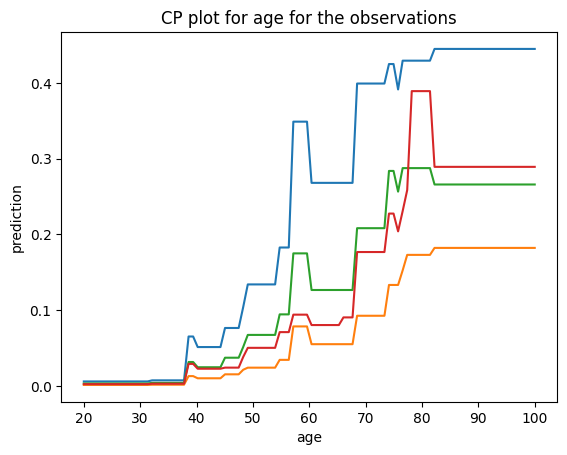

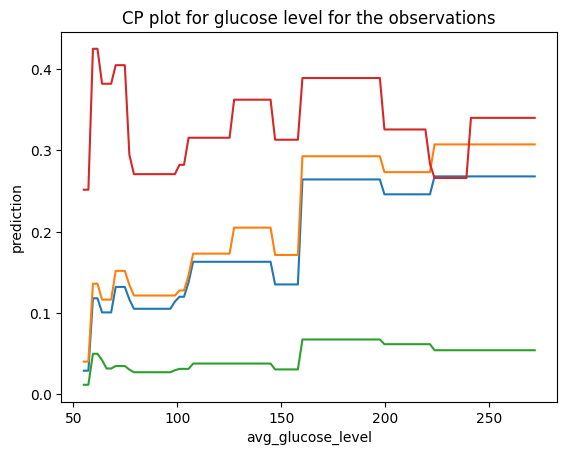

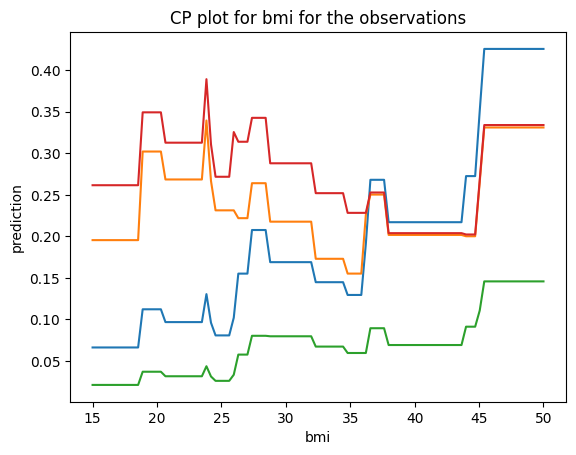

We can clearly see that age is the primary factor when predicting brain strokes. Greater age is very strongly correlated with brain stroke probability, without model and data noise the graph would certainly be monotonous.

Higher glucose levels also seem to increase stroke chances for 2 of the 4 observations, for the rest glucose levels seem to be hardly relevant, seemingly fitting to the noise in the data.

Similarly for BMI, higher BMI seems to increase stroke chances for some, this time hovewer it also decreases stroke chance for the rest, except for the biggest values which greatly increase the risks.

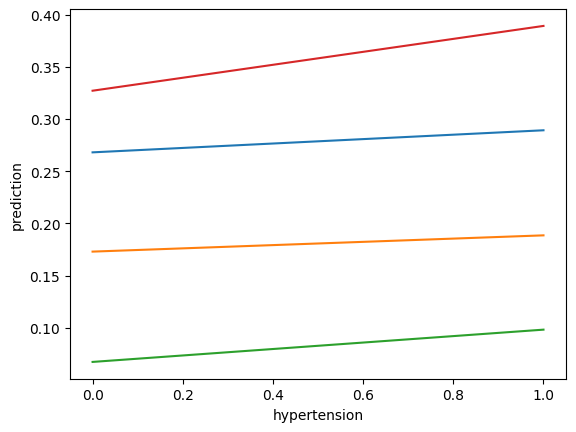

Effect of hypertension presence on the predictions.

It is the most relevant of the categorical variables and its impact is still much smaller than the numerical ones'.

#Observations with different CP profiles

As greater age almost exclusively increases stroke chance I will try to find different profiles for BMI as the examples showed opposite effects

I checked the first 500 observations to find the ones with the biggest differences of predictions for "maximum" and "minimum" BMI.

It looks like BMI can have a large "positive" effect on stroke chance (increase it) but even for the observations with the greatest "negative" effect the effect is still really small w.r.t absolute value compared to the possible increase in chance

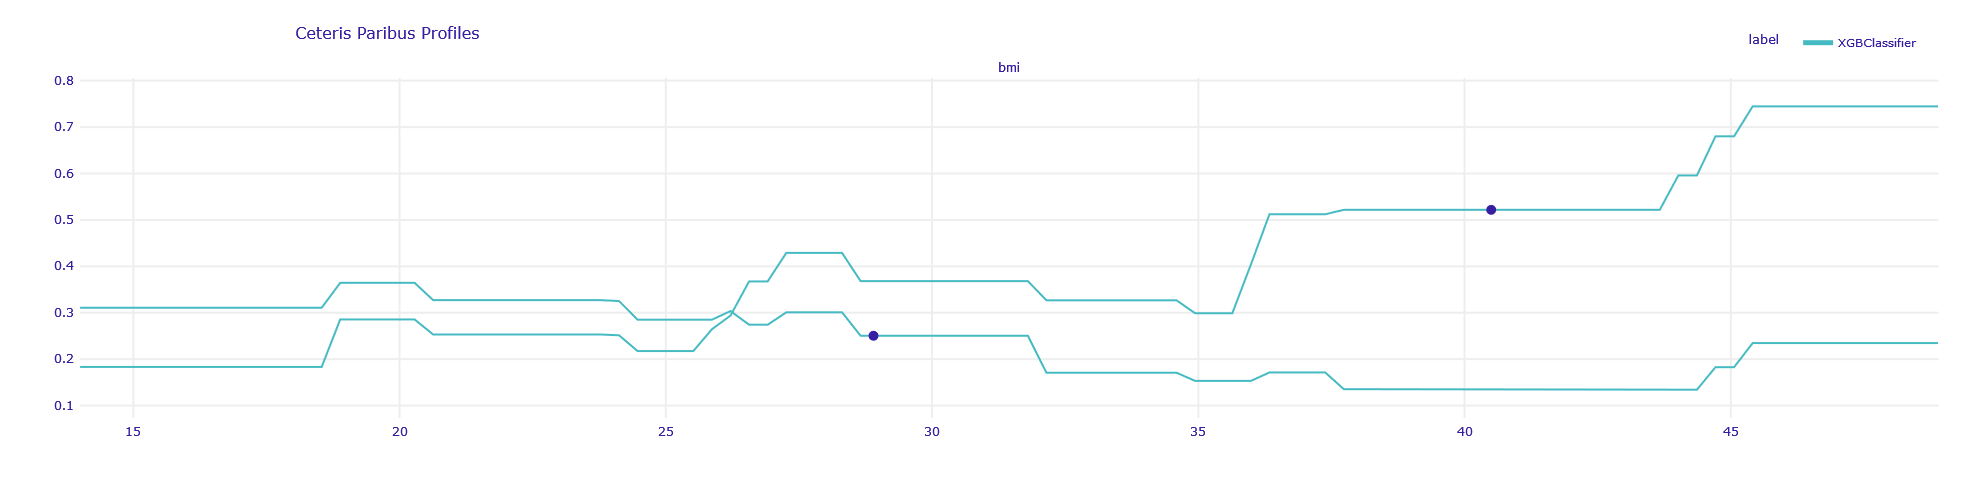

#CP vs PDP

I calculate PDP for the first 100 observations in the dataset. Using more (2000) made no meaningful change. PDP for the numerical variables:

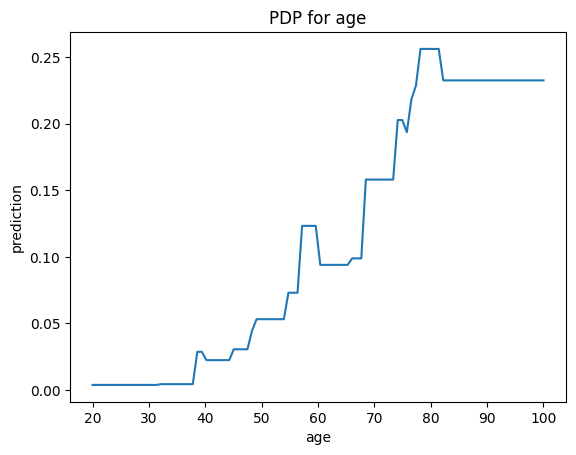

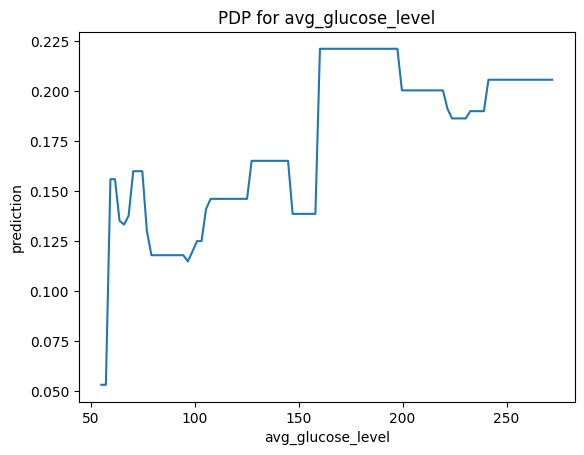

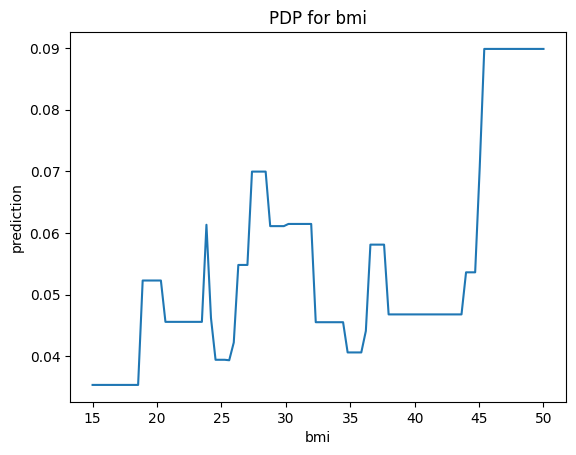

PDP shows general trends much better than CP which seems to present something akin to anecdotal evidence.

As expected, PDP rather clearly shows the effect that age has on stroke chance prediction.

The effect of glucose level is also not to be underestimated.

The perhaps most interesting find is that the effect of BMI on the prediction is:
- significantly smaller than age's and glucose level's
- seems to mainly be fitting to the noise in the dataset as the values on the plot almost seem random except the last part that affects the predictions in a much stronger way probably corresponding to the least healthy people.

#Comparison of PDP between models

The second model I use for the comparison is the default sklearn Random Forest Classifier

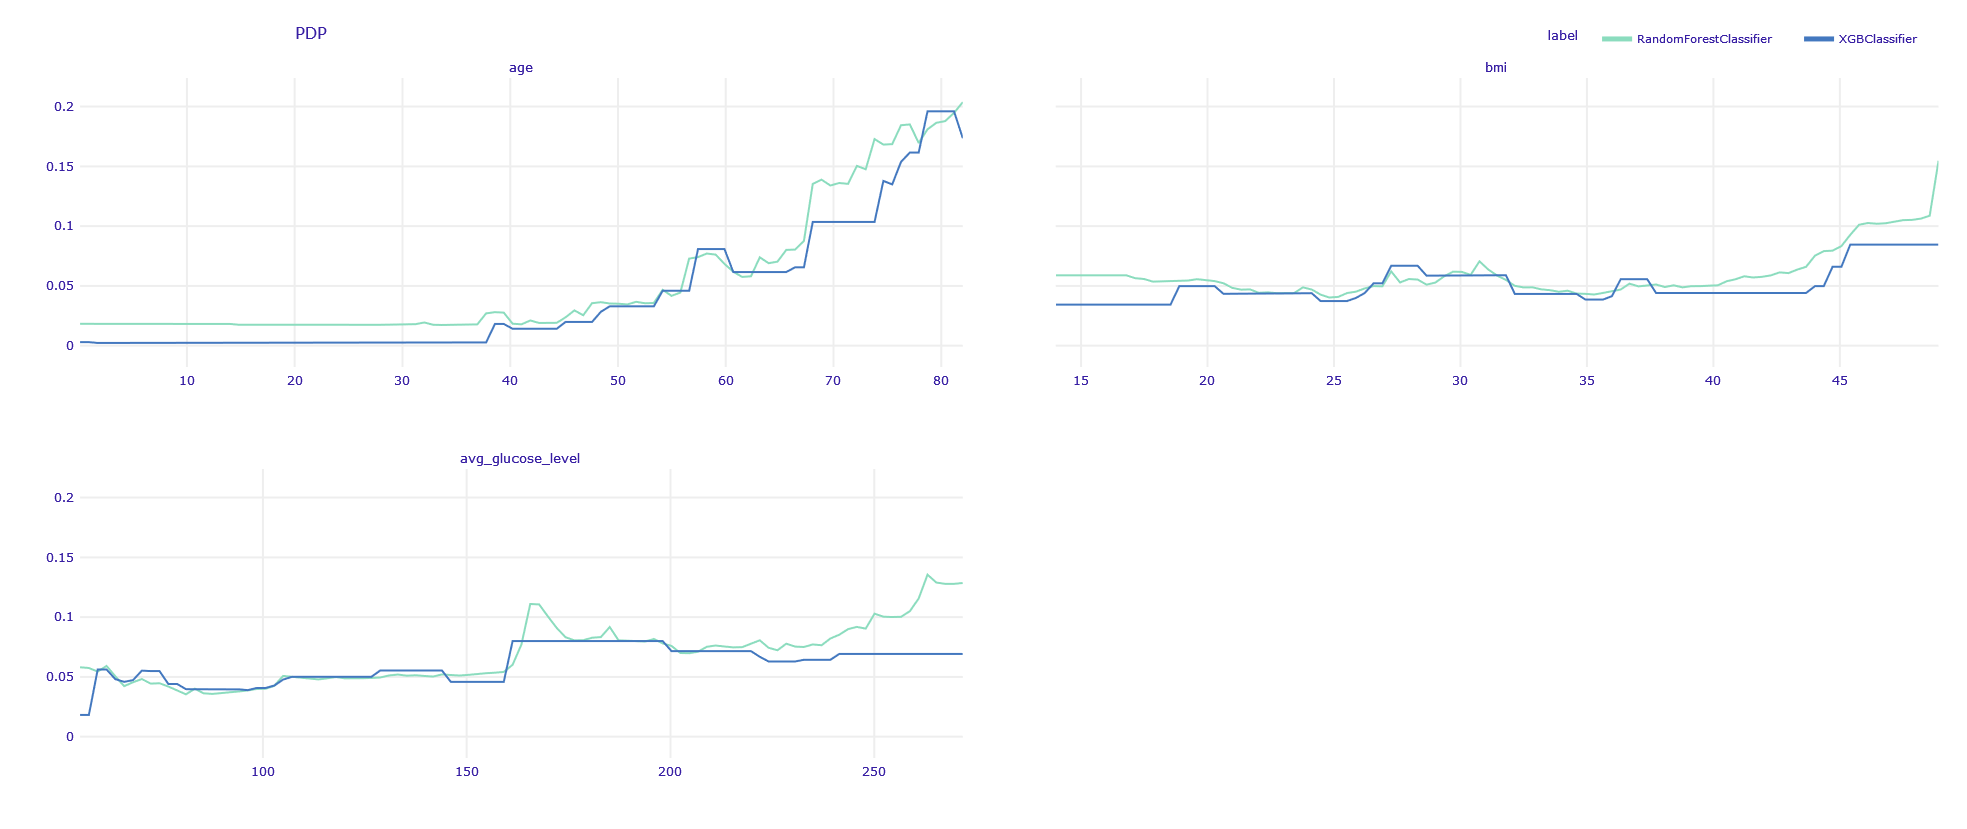

The comparison appears to show that the random forest is a stronger model that more closely fits the data as the plot is much more complex.

The comparison reinforces the assumption that age greatly increases and influences the stroke risk.

It also shows the impact that the greatest available values of glucose level and bmi have on the stroke prediction (presumably also risk).

#Appendix, Michał Szumielewicz

#Data setup

In [107]:
import pandas as pd
df = pd.read_csv('brain_stroke.csv')

df["ever_married"] = (df["ever_married"] == "Yes")
df["male"] = (df["gender"] == "Male")
df = df.drop(["gender"], axis=1)
for col in ["work_type", "Residence_type","smoking_status"]:

  one_hots = pd.get_dummies(df[col], prefix=col)
  df = pd.concat([df, one_hots], axis=1)
  df = df.drop([col], axis=1)

X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [108]:
X.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,male,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,True,228.69,36.6,True,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,True,105.92,32.5,True,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,True,171.23,34.4,False,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,True,174.12,24.0,False,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,True,186.21,29.0,True,0,1,0,0,0,1,0,1,0,0


In [209]:
X.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.129291,0.574182,0.161413,0.135113,0.491668,0.508332,0.301144,0.174061,0.369002,0.155792
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.335556,0.494516,0.367949,0.341879,0.499981,0.499981,0.458801,0.379200,0.482583,0.362694
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
y.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

#Models

In [147]:
import xgboost
from sklearn.ensemble import RandomForestClassifier

xgbmodel = xgboost.XGBClassifier(
    n_estimators=50,
    max_depth=2,
    use_label_encoder=False,
    eval_metric="logloss",
    enable_categorical=True,
    tree_method="hist"
)

rfmodel = RandomForestClassifier()

In [148]:
xgbmodel.fit(X, y)
rfmodel.fit(X, y)

RandomForestClassifier()

#Calculate predictions for some observations

In [239]:
obs = X.iloc[0:4]
obs

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,male,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,True,228.69,36.6,True,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,True,105.92,32.5,True,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,True,171.23,34.4,False,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,True,174.12,24.0,False,0,0,1,0,1,0,0,0,1,0


In [173]:
xgbmodel.predict_proba(obs)

array([[0.7319188 , 0.26808116],
       [0.82704264, 0.17295738],
       [0.9327532 , 0.06724677],
       [0.6107555 , 0.3892445 ]], dtype=float32)

#Ceteris Paribus profiles explanations

In [205]:
import numpy as np
import matplotlib.pyplot as plt

def plot_CP(model, observation, variable, min, max, n, obs_no = None):
  ob = observation.copy()
  y = []
  x = np.linspace(min,max,n)
  for v in x:
    ob[variable] = v
    y.append(model.predict_proba(ob)[0][1])
  plt.plot(x, y, linestyle='-')
  plt.xlabel(variable)
  plt.ylabel('prediction')
  if obs_no != None:
    plt.title(f'CP plot for {variable} for observation {obs_no}')


Text(0.5, 1.0, 'CP plot for age for the observations')

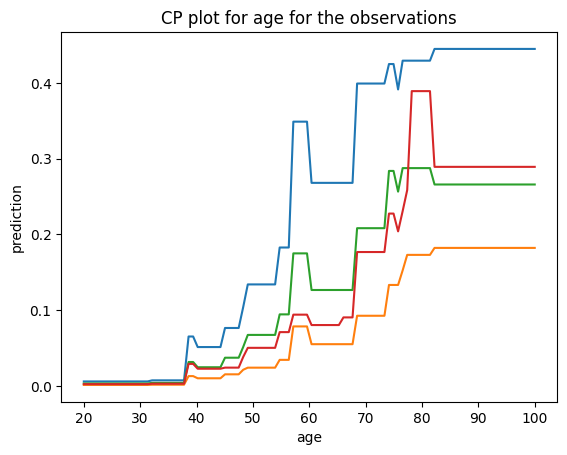

In [242]:
for ob in [obs.iloc[[0]],obs.iloc[[1]],obs.iloc[[2]],obs.iloc[[3]]]:
  plot_CP(xgbmodel, ob,"age",20,100,100)
plt.title(f'CP plot for age for the observations')

Text(0.5, 1.0, 'CP plot for glucose level for the observations')

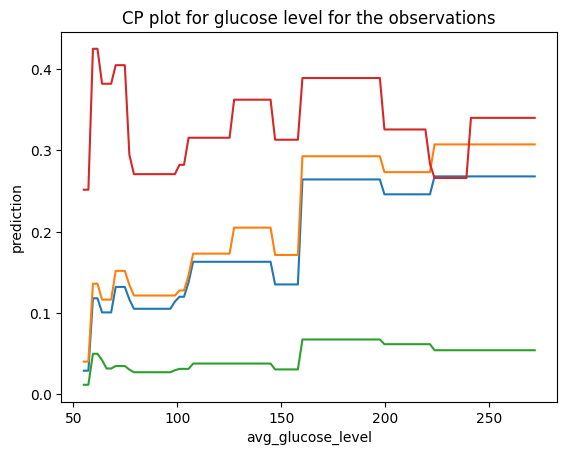

In [210]:
for ob in [obs.iloc[[0]],obs.iloc[[1]],obs.iloc[[2]],obs.iloc[[3]]]:
  plot_CP(xgbmodel, ob,"avg_glucose_level",55,272,100)
plt.title(f'CP plot for glucose level for the observations')

Text(0.5, 1.0, 'CP plot for bmi for the observations')

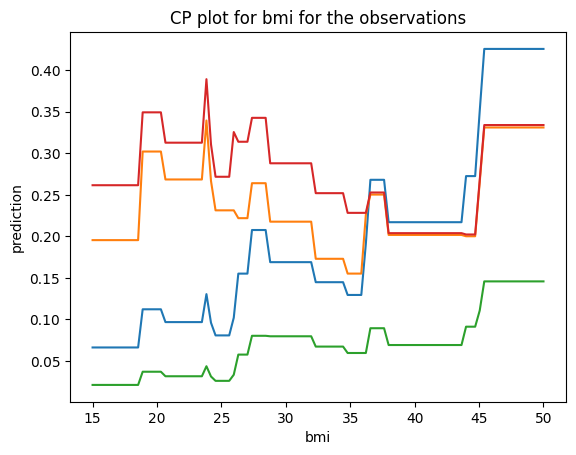

In [268]:
for ob in [obs.iloc[[0]],obs.iloc[[1]],obs.iloc[[2]],obs.iloc[[3]]]:
  plot_CP(xgbmodel, ob,"bmi",15,50,100)
plt.title(f'CP plot for bmi for the observations')

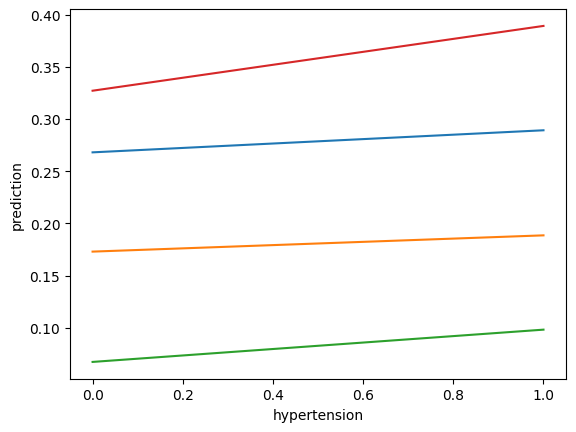

In [241]:
for ob in [obs.iloc[[0]],obs.iloc[[1]],obs.iloc[[2]],obs.iloc[[3]]]:
  plot_CP(xgbmodel, ob,"hypertension",0,1,2)

#Observations with different CP profiles

In [27]:
!pip install dalex
import dalex as dx

Preparation of a new explainer is initiated

  -> data              : 1048 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1048 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7ce7d880e4d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00199, mean = 0.178, max = 0.974
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.716, mean = -0.000148, max = 0.902
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names



In [149]:
explainer = dx.Explainer(xgbmodel, X, y)

Preparation of a new explainer is initiated

  -> data              : 4981 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4981 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7ce7d880e4d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000407, mean = 0.0499, max = 0.596
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.455, mean = -9.57e-05, max = 0.994
  -> model_info        : package xgboost

A new explainer has been created!


In [240]:
explainer.model_parts().result

,variable,dropout_loss,label
0,work_type_children,0.103160,XGBClassifier
1,Residence_type_Urban,0.103160,XGBClassifier
2,work_type_Govt_job,0.103160,XGBClassifier
3,_full_model_,0.103160,XGBClassifier
4,smoking_status_formerly smoked,0.103160,XGBClassifier
5,smoking_status_Unknown,0.103160,XGBClassifier
6,smoking_status_smokes,0.103464,XGBClassifier
7,ever_married,0.103600,XGBClassifier
8,Residence_type_Rural,0.103711,XGBClassifier
9,male,0.103811,XGBClassifier


In [ ]:
mindiff = 1000
mini = 0
maxdiff = -1000
maxi = 0
for i in range(500):
  vals = explainer.predict_profile(new_observation=X.iloc[[i]], variables="bmi")
  diff = vals.result.iloc[-1]["_yhat_"] - vals.result.iloc[0]["_yhat_"]
  # print(diff)
  if diff < mindiff:
    mindiff = diff
    mini = i
  if diff > maxdiff:
    maxdiff = diff
    maxi = i

In [213]:
cp = explainer.predict_profile(new_observation=X.iloc[[mini,maxi]])
cp.plot(variables=["bmi"])

Calculating ceteris paribus: 100%|██████████| 17/17 [00:00<00:00, 153.48it/s]


#PDP

In [225]:
def plot_PDP(model, observations, variable, min, max, n):
  ob = observations.copy()
  y = []
  x = np.linspace(min,max,n)
  for v in x:
    ob[variable] = v

    y.append(np.mean(model.predict_proba(ob)[:,1]))
  plt.plot(x, y, linestyle='-')
  plt.xlabel(variable)
  plt.ylabel('prediction')
  plt.title(f'PDP for {variable}')

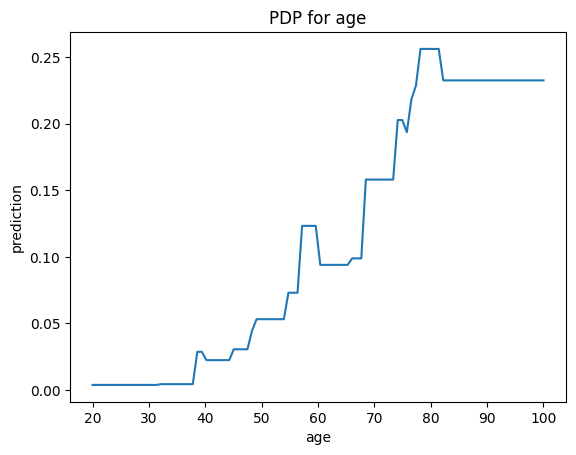

In [248]:
plot_PDP(xgbmodel, X.iloc[0:100], "age",20,100,100)

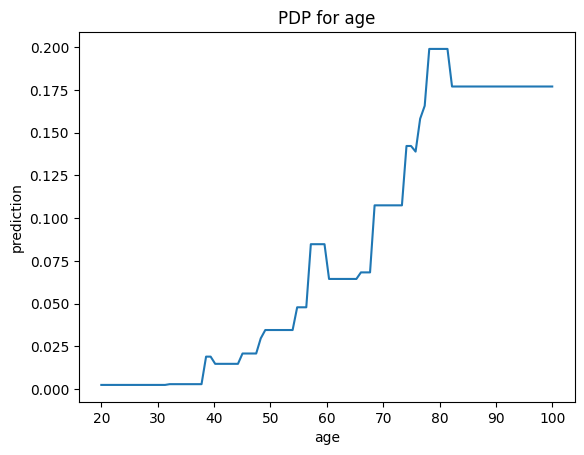

In [249]:
plot_PDP(xgbmodel, X.iloc[0:2000], "age",20,100,100)

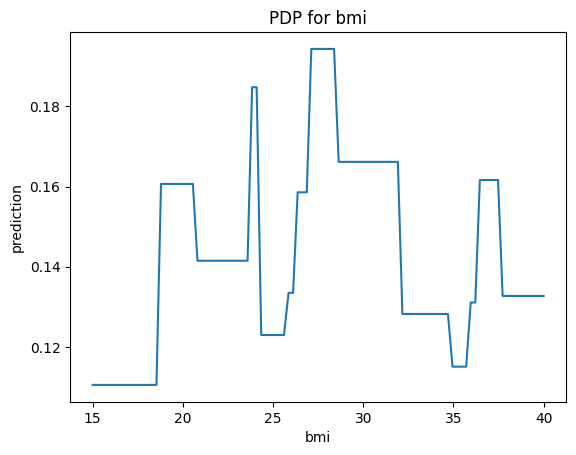

In [251]:
plot_PDP(xgbmodel, X.iloc[0:100], "bmi",15,40,100)

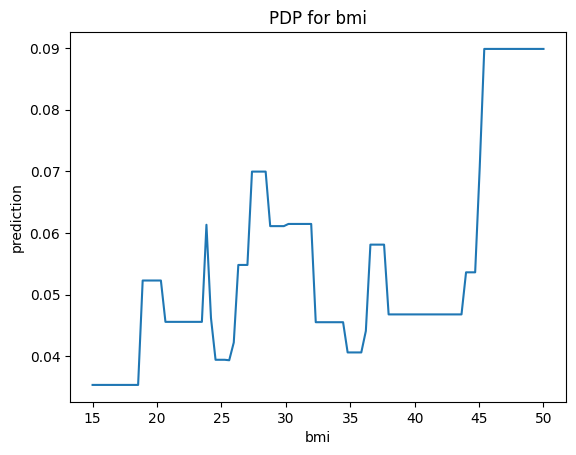

In [269]:
plot_PDP(xgbmodel, X.iloc[0:2000], "bmi",15,50,100)

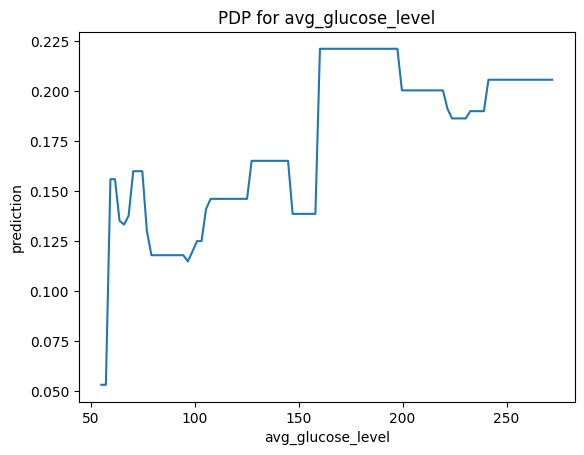

In [231]:
plot_PDP(xgbmodel, X.iloc[0:100],"avg_glucose_level",55,272,100)

In [260]:
explainer2 = dx.Explainer(rfmodel, X, y)

Preparation of a new explainer is initiated

  -> data              : 4981 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4981 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7ce7d880e4d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



  -> predicted values  : min = 0.0, mean = 0.0505, max = 0.86
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.28, mean = -0.000679, max = 0.46
  -> model_info        : package sklearn

A new explainer has been created!


In [264]:
pdp2 = explainer2.model_profile()
pdp = explainer.model_profile()

Calculating ceteris paribus: 100%|██████████| 17/17 [00:00<00:00, 19.59it/s]


In [266]:
pdp2.plot(pdp, variables=["age", "bmi", "avg_glucose_level"], title="PDP")